In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r"D:\Dhika Ramadhan Saputra\Data Analist\Latihan data cleaning\Latihan validasi data\vgsales.csv")
df.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [ ]:
# Langkah - Langkah Validasi Data:
# 1. Cek struktur Data
# 2. Cek missing values
# 3. Cek distribusi Data
# 4. Cek duplikasi Data
# 5. Cek format data

In [5]:
# Cek Struktur Data
df.info()

# Masalah yang ditemukan:
# 1. kolom 'year' harusnya integer

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [6]:
# Cek missing vallues
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

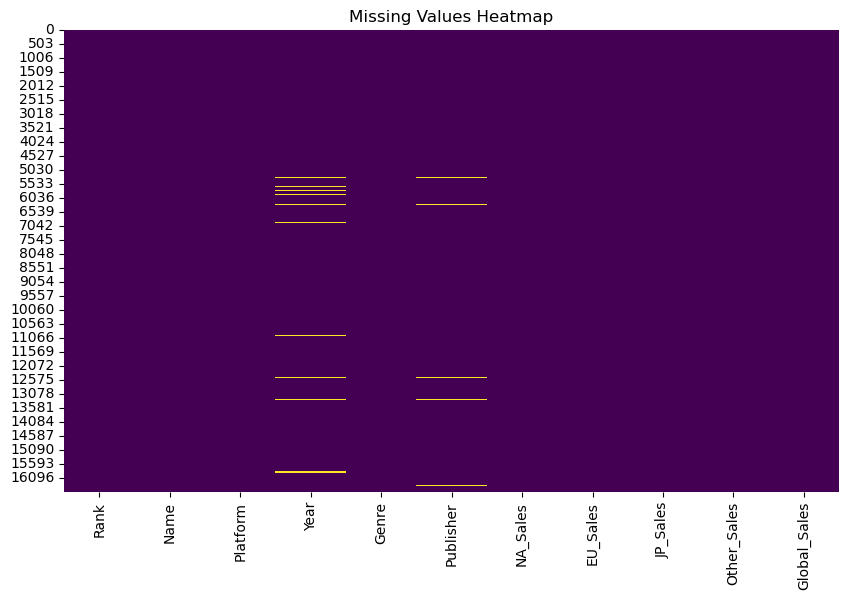

In [7]:
# cek missing values pakai visualisasi
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()


# Catatan : cuma bisa liat sekilas, gabisa detail kaya metode isnull().sum()

In [8]:
# Liat row yang ada missing values nya
df[df.isnull().any(axis=1)]


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
179,180,Madden NFL 2004,PS2,NaN,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23
377,378,FIFA Soccer 2004,PS2,NaN,Sports,Electronic Arts,0.59,2.36,0.04,0.51,3.49
431,432,LEGO Batman: The Videogame,Wii,NaN,Action,Warner Bros. Interactive Entertainment,1.86,1.02,0.00,0.29,3.17
470,471,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0.00,0.41,3.00
607,608,Space Invaders,2600,NaN,Shooter,Atari,2.36,0.14,0.00,0.03,2.53
...,...,...,...,...,...,...,...,...,...,...,...
16427,16430,Virtua Quest,GC,NaN,Role-Playing,Unknown,0.01,0.00,0.00,0.00,0.01
16493,16496,The Smurfs,3DS,NaN,Action,Unknown,0.00,0.01,0.00,0.00,0.01
16494,16497,Legends of Oz: Dorothy's Return,3DS,2014.0,Puzzle,NaN,0.00,0.01,0.00,0.00,0.01
16543,16546,Driving Simulator 2011,PC,2011.0,Racing,NaN,0.00,0.01,0.00,0.00,0.01


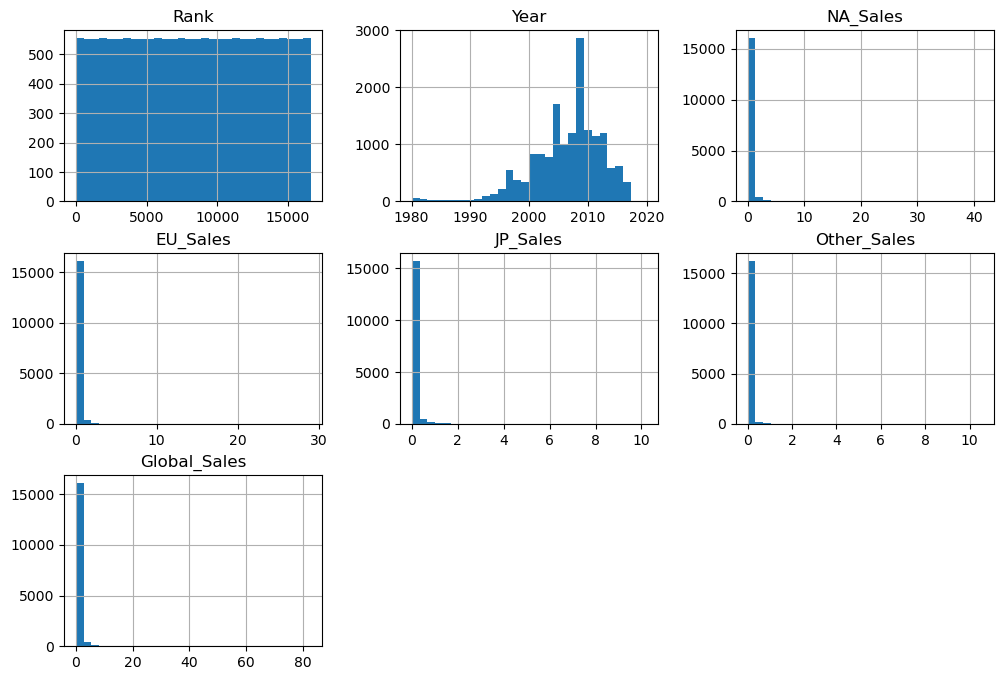

In [9]:
#cek distribusi data
df.hist(figsize=(12, 8), bins=30)
plt.show()


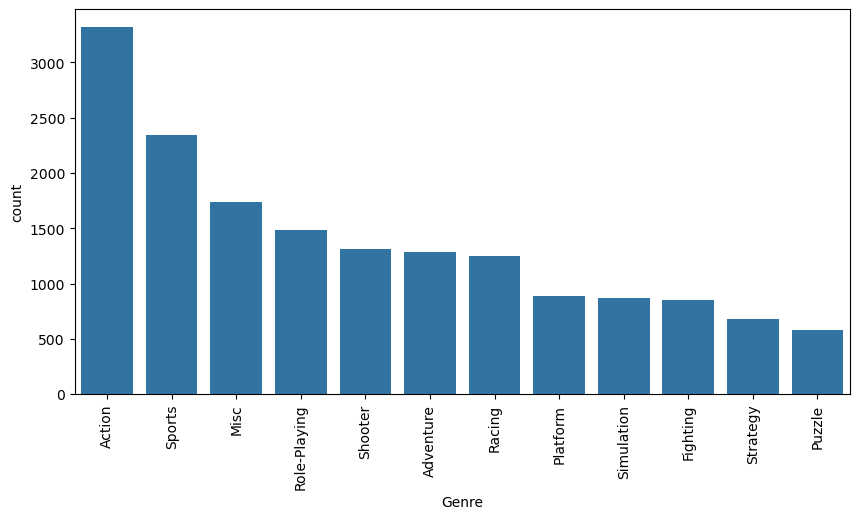

In [10]:
plt.figure(figsize=(10, 5))
sns.countplot(x=df["Genre"], order=df["Genre"].value_counts().index)
plt.xticks(rotation=90)
plt.show()


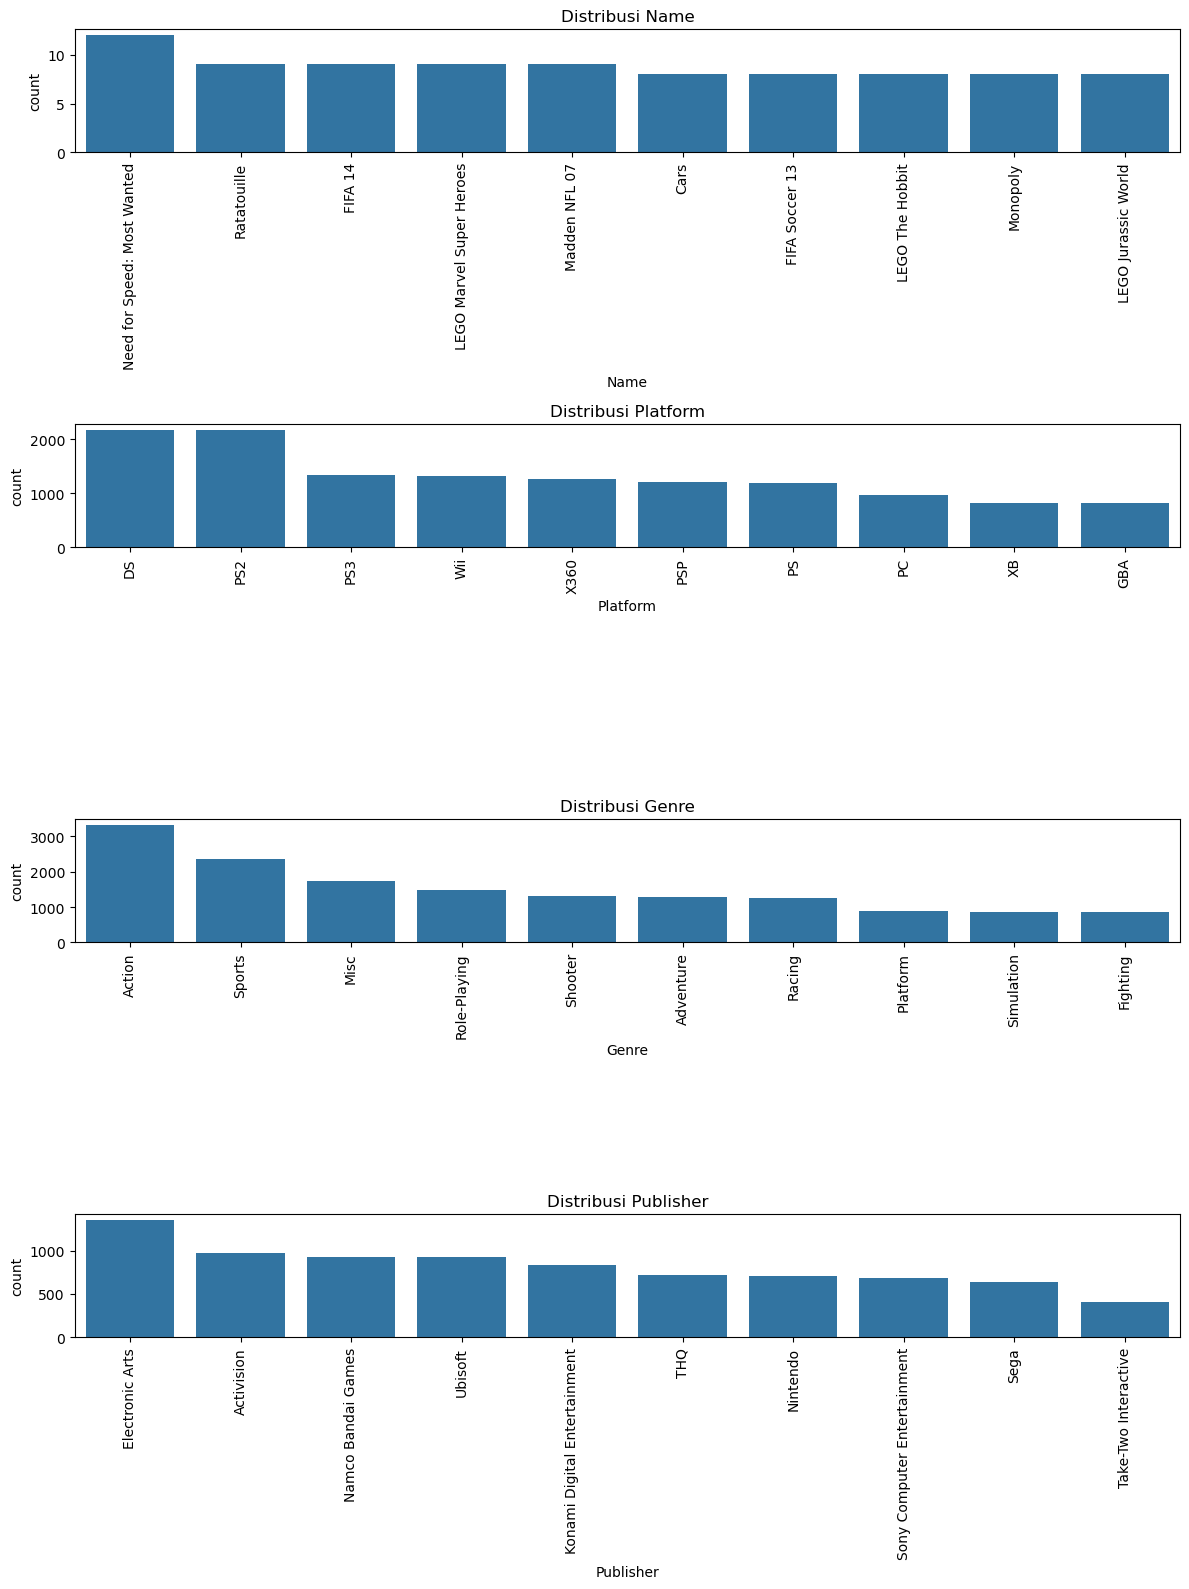

In [11]:

categorical_cols = df.select_dtypes(include=['object']).columns

plt.figure(figsize=(12, len(categorical_cols) * 4)) 

for i, col in enumerate(categorical_cols, 1):
    top_categories = df[col].value_counts().nlargest(10).index  # Ambil 10 kategori terbanyak
    plt.subplot(len(categorical_cols), 1, i)
    sns.countplot(x=df[col], order=top_categories)  # Hanya plot 10 kategori
    plt.xticks(rotation=90)
    plt.title(f"Distribusi {col}")

plt.tight_layout()
plt.show()



In [13]:
# Cek duplikasi data
df.duplicated().sum()

0

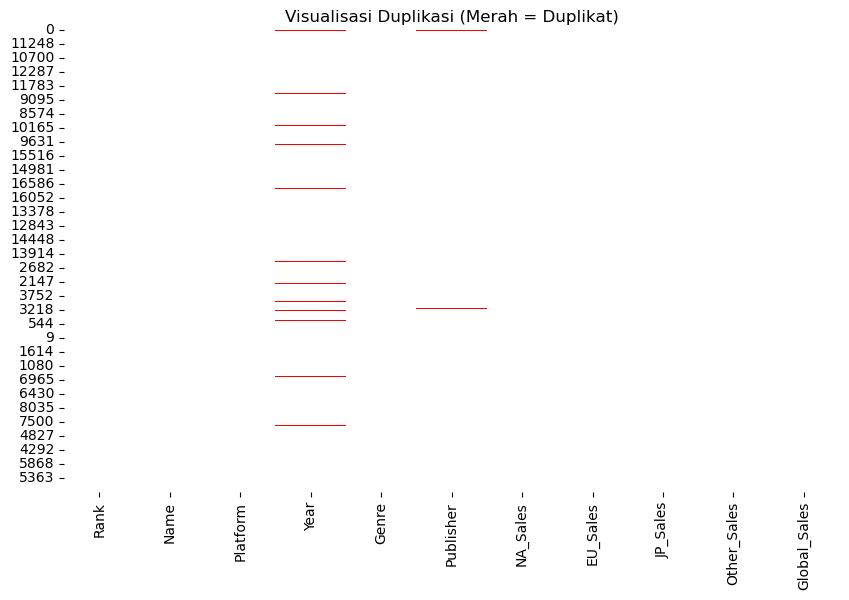

In [15]:
import seaborn as sns
import numpy as np

# Buat kolom baru: 1 = duplikat, 0 = unik
df["is_duplicate"] = np.where(df.duplicated(), 1, 0)

# Visualisasi pakai heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.sort_values("is_duplicate", ascending=False).iloc[:, :-1].isnull(), cmap=["white", "red"], cbar=False)
plt.title("Visualisasi Duplikasi (Merah = Duplikat)")
plt.show()
